# 🚀 Getting Started with Cloud MLOps using Vertex AI

Welcome to the Cloud MLOps project! This notebook will guide you through the complete setup process for developing an end-to-end machine learning pipeline using Google Cloud Platform and Vertex AI.

## 📋 What You'll Accomplish

By the end of this notebook, you'll have:

- ✅ A properly configured Google Cloud project with Vertex AI enabled
- ✅ Authentication set up for all GCP services
- ✅ A Cloud Storage bucket ready for ML artifacts
- ✅ A sample dataset prepared and uploaded to GCS
- ✅ All dependencies installed for MLOps development
- ✅ Verified connectivity to all required services

## 🎓 Prerequisites

Before starting, make sure you have:

- Google Cloud account with billing enabled
- Applied for student credits (GCP Free Tier + GitHub Student Pack)
- Python 3.8+ installed
- Basic familiarity with Python and Jupyter notebooks

Let's get started! 🎯

## 1. Environment Setup and Prerequisites

Let's start by checking your Python environment and system requirements.

In [2]:
import sys
import platform
import subprocess
from pathlib import Path

def check_python_version():
    """Check if Python version meets requirements (3.8+)."""
    version = sys.version_info
    print(f"🐍 Python Version: {version.major}.{version.minor}.{version.micro}")
    
    if version.major >= 3 and version.minor >= 8:
        print("✅ Python version requirement met!")
        return True
    else:
        print("❌ Python 3.8+ is required!")
        return False

def check_system_info():
    """Display system information."""
    print(f"💻 Operating System: {platform.system()} {platform.release()}")
    print(f"🏗️  Architecture: {platform.machine()}")
    
def check_virtual_environment():
    """Check if running in virtual environment."""
    if hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix):
        print("✅ Running in virtual environment")
        print(f"📁 Environment path: {sys.prefix}")
        return True
    else:
        print("⚠️  Not running in virtual environment")
        print("💡 Consider creating one: python -m venv venv && source venv/bin/activate")
        return False

# Run checks
print("🔍 Environment Check")
print("=" * 50)
check_python_version()
check_system_info()
check_virtual_environment()

# Check if we're in the correct project directory
current_dir = Path.cwd()
print(f"\n📂 Current Directory: {current_dir}")

# Look for key project files
expected_files = ["PLANNING.md", "TASKS.md", "requirements.txt"]
for file in expected_files:
    if (current_dir / file).exists() or (current_dir.parent / file).exists():
        print(f"✅ Found {file}")
    else:
        print(f"❌ Missing {file}")

print("\n" + "=" * 50)

🔍 Environment Check
🐍 Python Version: 3.13.7
✅ Python version requirement met!
💻 Operating System: Darwin 25.0.0
🏗️  Architecture: arm64
✅ Running in virtual environment
📁 Environment path: /Users/farishussain/MLOps/.venv

📂 Current Directory: /Users/farishussain/MLOps/notebooks
✅ Found PLANNING.md
✅ Found TASKS.md
✅ Found requirements.txt



## 2. Google Cloud Project Configuration

Now let's set up your Google Cloud project variables. **Important:** You need to replace the placeholder values with your actual project details.

In [9]:
# 🚨 IMPORTANT: Replace these values with your actual project details!
import os

# Your Google Cloud Project Configuration
PROJECT_ID = "mlops-295610"  # Your new MLOps project ID
PROJECT_NUMBER = "293997883832"       # Your project number
REGION = "us-central1"                # Default region for Vertex AI
ZONE = "us-central1-a"               # Default zone

# Storage Configuration  
BUCKET_NAME = f"{PROJECT_ID}-mlops-bucket"  # Must be globally unique
DATA_ROOT = "data"
MODELS_ROOT = "models"  
PIPELINES_ROOT = "pipelines"
OUTPUTS_ROOT = "outputs"

# Display configuration
print("🔧 Project Configuration")
print("=" * 50)
print(f"📝 Project ID: {PROJECT_ID}")
print(f"🌍 Region: {REGION}")
print(f"📍 Zone: {ZONE}")
print(f"🪣 Bucket Name: {BUCKET_NAME}")
print("=" * 50)

# Validation
if PROJECT_ID == "your-mlops-project-id":
    print("⚠️  WARNING: Please update PROJECT_ID with your actual project ID!")
    print("💡 Get your project ID from: https://console.cloud.google.com/")
else:
    print("✅ Project configuration looks good!")
    print(f"🎯 Using account: {os.popen('gcloud auth list --filter=status:ACTIVE --format=\"value(account)\"').read().strip()}")

🔧 Project Configuration
📝 Project ID: mlops-295610
🌍 Region: us-central1
📍 Zone: us-central1-a
🪣 Bucket Name: mlops-295610-mlops-bucket
✅ Project configuration looks good!
🎯 Using account: farishussain049@gmail.com
🎯 Using account: farishussain049@gmail.com


## 3. Install Required Python Libraries

Let's install all the essential packages needed for our MLOps project. This may take a few minutes.

In [4]:
# Install core packages for MLOps with Vertex AI
import subprocess
import sys

def install_package(package):
    """Install a package using pip."""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
        print(f"✅ Successfully installed: {package}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install: {package}")
        print(f"Error: {e}")
        return False

# Essential packages for MLOps
packages = [
    "google-cloud-aiplatform>=1.38.0",
    "google-cloud-storage>=2.10.0", 
    "kfp>=2.4.0",
    "pandas>=2.0.0",
    "numpy>=1.24.0",
    "scikit-learn>=1.3.0",
    "tensorflow>=2.13.0",
    "matplotlib>=3.7.0",
    "seaborn>=0.12.0",
    "tqdm>=4.65.0"
]

print("📦 Installing MLOps packages...")
print("=" * 50)

failed_packages = []
for package in packages:
    if not install_package(package):
        failed_packages.append(package)

print("\n" + "=" * 50)
if failed_packages:
    print(f"❌ Failed to install: {failed_packages}")
    print("💡 Try installing manually: pip install <package-name>")
else:
    print("🎉 All packages installed successfully!")
    
print("✨ Installation complete!")

📦 Installing MLOps packages...
✅ Successfully installed: google-cloud-aiplatform>=1.38.0
✅ Successfully installed: google-cloud-storage>=2.10.0
✅ Successfully installed: kfp>=2.4.0
✅ Successfully installed: pandas>=2.0.0
✅ Successfully installed: numpy>=1.24.0
✅ Successfully installed: scikit-learn>=1.3.0
✅ Successfully installed: tensorflow>=2.13.0
✅ Successfully installed: matplotlib>=3.7.0
✅ Successfully installed: seaborn>=0.12.0
✅ Successfully installed: tqdm>=4.65.0

🎉 All packages installed successfully!
✨ Installation complete!


## 4. Configure GCP Authentication

Now let's set up authentication with Google Cloud Platform. This is essential for accessing Vertex AI and other GCP services.

In [12]:
import subprocess
from google.cloud import aiplatform
from google.oauth2 import service_account
import os

def check_gcloud_auth():
    """Check if gcloud is authenticated."""
    try:
        result = subprocess.run(['gcloud', 'auth', 'list', '--format=value(account)'], 
                              capture_output=True, text=True, check=True)
        accounts = result.stdout.strip().split('\n')
        active_accounts = [acc for acc in accounts if acc.strip()]
        
        if active_accounts:
            print("✅ Google Cloud authentication detected!")
            for account in active_accounts:
                print(f"   📧 Account: {account}")
            return True
        else:
            print("❌ No authenticated Google Cloud accounts found")
            return False
    except (subprocess.CalledProcessError, FileNotFoundError):
        print("❌ Google Cloud CLI not found or authentication failed")
        return False

def setup_vertex_ai():
    """Initialize Vertex AI with project configuration."""
    try:
        # Initialize Vertex AI
        aiplatform.init(
            project=PROJECT_ID,
            location=REGION,
            staging_bucket=f"gs://{BUCKET_NAME}"
        )
        print("✅ Vertex AI initialized successfully!")
        print(f"   📝 Project: {PROJECT_ID}")
        print(f"   🌍 Location: {REGION}")
        return True
    except Exception as e:
        print(f"❌ Failed to initialize Vertex AI: {e}")
        return False

print("🔐 Authentication Setup")
print("=" * 50)

# Check authentication
auth_ok = check_gcloud_auth()

if not auth_ok:
    print("\n💡 To authenticate, run these commands in your terminal:")
    print("   1. gcloud auth login")
    print("   2. gcloud config set project", PROJECT_ID)
    print("   3. gcloud auth application-default login")
    print("\n⚠️  Please authenticate and then re-run this cell.")
else:
    print("\n🚀 Setting up Vertex AI...")
    vertex_ok = setup_vertex_ai()
    
    if vertex_ok:
        print("\n🎉 Authentication and Vertex AI setup complete!")
    else:
        print("\n⚠️  Vertex AI setup failed. Check your project configuration.")

print("=" * 50)

🔐 Authentication Setup
✅ Google Cloud authentication detected!
   📧 Account: faris.hussain@enmacc.com
   📧 Account: farishussain049@gmail.com

🚀 Setting up Vertex AI...
✅ Vertex AI initialized successfully!
   📝 Project: mlops-295610
   🌍 Location: us-central1

🎉 Authentication and Vertex AI setup complete!
✅ Google Cloud authentication detected!
   📧 Account: faris.hussain@enmacc.com
   📧 Account: farishussain049@gmail.com

🚀 Setting up Vertex AI...
✅ Vertex AI initialized successfully!
   📝 Project: mlops-295610
   🌍 Location: us-central1

🎉 Authentication and Vertex AI setup complete!


## 5. Enable Required APIs

Let's enable the Google Cloud APIs that our MLOps pipeline will need. This step requires proper authentication.

In [10]:
def enable_api(api_name):
    """Enable a Google Cloud API."""
    try:
        cmd = ['gcloud', 'services', 'enable', api_name, '--project', PROJECT_ID]
        result = subprocess.run(cmd, capture_output=True, text=True, check=True)
        print(f"✅ Enabled: {api_name}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to enable {api_name}: {e.stderr}")
        return False
    except FileNotFoundError:
        print("❌ gcloud CLI not found. Please install it first.")
        return False

# Required APIs for MLOps pipeline
required_apis = [
    "aiplatform.googleapis.com",      # Vertex AI
    "storage.googleapis.com",         # Cloud Storage
    "cloudbuild.googleapis.com",      # Cloud Build
    "containerregistry.googleapis.com", # Container Registry
    "compute.googleapis.com",         # Compute Engine (for training)
    "iam.googleapis.com",            # Identity and Access Management
    "logging.googleapis.com",        # Cloud Logging
    "monitoring.googleapis.com"      # Cloud Monitoring
]

print("🔧 Enabling Required APIs")
print("=" * 50)
print("⏳ This may take a few minutes...")

failed_apis = []
for api in required_apis:
    print(f"🔄 Enabling {api}...")
    if not enable_api(api):
        failed_apis.append(api)

print("\n" + "=" * 50)
if failed_apis:
    print(f"❌ Failed to enable: {failed_apis}")
    print("💡 Try enabling manually in the GCP Console")
    print("   https://console.cloud.google.com/apis/library")
else:
    print("🎉 All required APIs enabled successfully!")
    
print("\n✅ API setup complete!")

🔧 Enabling Required APIs
⏳ This may take a few minutes...
🔄 Enabling aiplatform.googleapis.com...
✅ Enabled: aiplatform.googleapis.com
🔄 Enabling storage.googleapis.com...
✅ Enabled: storage.googleapis.com
🔄 Enabling cloudbuild.googleapis.com...
❌ Failed to enable cloudbuild.googleapis.com: ERROR: (gcloud.services.enable) FAILED_PRECONDITION: Billing account for project '293997883832' is not found. Billing must be enabled for activation of service(s) 'cloudbuild.googleapis.com,artifactregistry.googleapis.com,containerregistry.googleapis.com' to proceed.
Help Token: AXcLsyA7D_fKlN4Ts-k0_I-AoTJ8rCWmcw5B4wEEyNiNJCrqBSdvnue1FPt1WBuiPqgWDg3lN8lAItU_R9yl-evB56YlYsQjUVubq3Um_dgC-T6k
- '@type': type.googleapis.com/google.rpc.PreconditionFailure
  violations:
  - subject: ?error_code=390001&project=293997883832&services=cloudbuild.googleapis.com&services=artifactregistry.googleapis.com&services=containerregistry.googleapis.com
    type: googleapis.com/billing-enabled
- '@type': type.googleapis.

## 6. Create Cloud Storage Bucket

Now let's create a Cloud Storage bucket to store our ML artifacts, data, and pipeline outputs.

In [12]:
from google.cloud import storage
import io

def create_bucket_if_not_exists(bucket_name, location="US"):
    """Create a Cloud Storage bucket if it doesn't exist."""
    try:
        client = storage.Client(project=PROJECT_ID)
        
        # Check if bucket already exists
        try:
            bucket = client.get_bucket(bucket_name)
            print(f"✅ Bucket '{bucket_name}' already exists")
            return bucket
        except:
            pass
        
        # Create new bucket
        bucket = client.create_bucket(bucket_name, location=location)
        print(f"✅ Created bucket '{bucket_name}' in {location}")
        return bucket
        
    except Exception as e:
        print(f"❌ Failed to create bucket '{bucket_name}': {e}")
        return None

def create_folder_structure(bucket, folders):
    """Create folder structure in the bucket."""
    try:
        for folder in folders:
            # Create a placeholder file to establish the folder
            blob_name = f"{folder}/.gitkeep"
            blob = bucket.blob(blob_name)
            blob.upload_from_string("")
            print(f"📁 Created folder: {folder}/")
        return True
    except Exception as e:
        print(f"❌ Failed to create folder structure: {e}")
        return False

print("🪣 Cloud Storage Setup")
print("=" * 50)
print(f"📝 Bucket name: {BUCKET_NAME}")

# Create the bucket
bucket = create_bucket_if_not_exists(BUCKET_NAME, location=REGION.upper())

if bucket:
    # Create folder structure
    folders = [DATA_ROOT, MODELS_ROOT, PIPELINES_ROOT, OUTPUTS_ROOT]
    print(f"\n📁 Creating folder structure...")
    
    if create_folder_structure(bucket, folders):
        print("✅ Folder structure created successfully!")
        
        # List the created structure
        print(f"\n📂 Bucket structure:")
        for folder in folders:
            print(f"   📁 gs://{BUCKET_NAME}/{folder}/")
    else:
        print("❌ Failed to create folder structure")
        
    # Set the staging bucket for Vertex AI
    print(f"\n🎯 Vertex AI staging bucket: gs://{BUCKET_NAME}")
    
else:
    print("❌ Could not create or access bucket")
    print("💡 Make sure:")
    print("   1. Your project ID is correct")
    print("   2. You have Storage Admin permissions")
    print("   3. The bucket name is globally unique")

print("=" * 50)

🪣 Cloud Storage Setup
📝 Bucket name: mlops-295610-mlops-bucket
✅ Created bucket 'mlops-295610-mlops-bucket' in US-CENTRAL1

📁 Creating folder structure...
📁 Created folder: data/
📁 Created folder: models/
📁 Created folder: pipelines/
📁 Created folder: outputs/
✅ Folder structure created successfully!

📂 Bucket structure:
   📁 gs://mlops-295610-mlops-bucket/data/
   📁 gs://mlops-295610-mlops-bucket/models/
   📁 gs://mlops-295610-mlops-bucket/pipelines/
   📁 gs://mlops-295610-mlops-bucket/outputs/

🎯 Vertex AI staging bucket: gs://mlops-295610-mlops-bucket


## 7. Test GCP Connectivity

Let's verify that all our GCP services are properly configured and accessible.

In [13]:
def test_vertex_ai_connection():
    """Test Vertex AI connectivity."""
    try:
        # List available models (this tests API access)
        models = aiplatform.Model.list(
            filter=f'display_name="*"',
            order_by="create_time desc"
        )
        print("✅ Vertex AI connection successful")
        print(f"   📊 Found {len(models)} existing models")
        return True
    except Exception as e:
        print(f"❌ Vertex AI connection failed: {e}")
        return False

def test_storage_connection():
    """Test Cloud Storage connectivity."""
    try:
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        
        # Test write access
        test_blob = bucket.blob("test/connectivity_test.txt")
        test_blob.upload_from_string("Connection test successful!")
        
        # Test read access
        content = test_blob.download_as_text()
        
        # Clean up test file
        test_blob.delete()
        
        print("✅ Cloud Storage connection successful")
        print("   📁 Read/write access confirmed")
        return True
    except Exception as e:
        print(f"❌ Cloud Storage connection failed: {e}")
        return False

def test_project_permissions():
    """Test basic project permissions."""
    try:
        # Test if we can list services
        result = subprocess.run(['gcloud', 'services', 'list', '--project', PROJECT_ID], 
                              capture_output=True, text=True, check=True)
        enabled_services = len(result.stdout.strip().split('\n')) - 1  # Subtract header
        print("✅ Project permissions verified")
        print(f"   🔧 {enabled_services} services enabled")
        return True
    except Exception as e:
        print(f"❌ Project permission test failed: {e}")
        return False

print("🔍 Connectivity Tests")
print("=" * 50)

tests = [
    ("Project Permissions", test_project_permissions),
    ("Cloud Storage", test_storage_connection), 
    ("Vertex AI", test_vertex_ai_connection)
]

results = {}
for test_name, test_func in tests:
    print(f"\n🧪 Testing {test_name}...")
    results[test_name] = test_func()

print("\n" + "=" * 50)
print("📋 Test Summary:")
for test_name, passed in results.items():
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"   {test_name}: {status}")

all_passed = all(results.values())
if all_passed:
    print("\n🎉 All connectivity tests passed! Your environment is ready!")
else:
    print("\n⚠️  Some tests failed. Please check your configuration.")

print("=" * 50)

🔍 Connectivity Tests

🧪 Testing Project Permissions...
✅ Project permissions verified
   🔧 25 services enabled

🧪 Testing Cloud Storage...
✅ Cloud Storage connection successful
   📁 Read/write access confirmed

🧪 Testing Vertex AI...
✅ Vertex AI connection successful
   📊 Found 0 existing models

📋 Test Summary:
   Project Permissions: ✅ PASS
   Cloud Storage: ✅ PASS
   Vertex AI: ✅ PASS

🎉 All connectivity tests passed! Your environment is ready!


## 8. Download and Prepare Sample Dataset

Let's download and prepare the classic Iris flower dataset for our MLOps pipeline demonstration. The Iris dataset is perfect for learning MLOps concepts - it's small, clean, and ideal for classification tasks.

Matplotlib is building the font cache; this may take a moment.


🌸 Setting up Iris dataset for MLOps learning...
🌸 Loading Iris flower dataset...
✅ Loaded Iris dataset successfully!
   📊 Total samples: 150
   🏷️  Classes: 3
   📈 Features: 4

📊 Dataset Exploration
📈 Shape: (150, 6)
📏 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
🏷️  Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

📋 Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

   

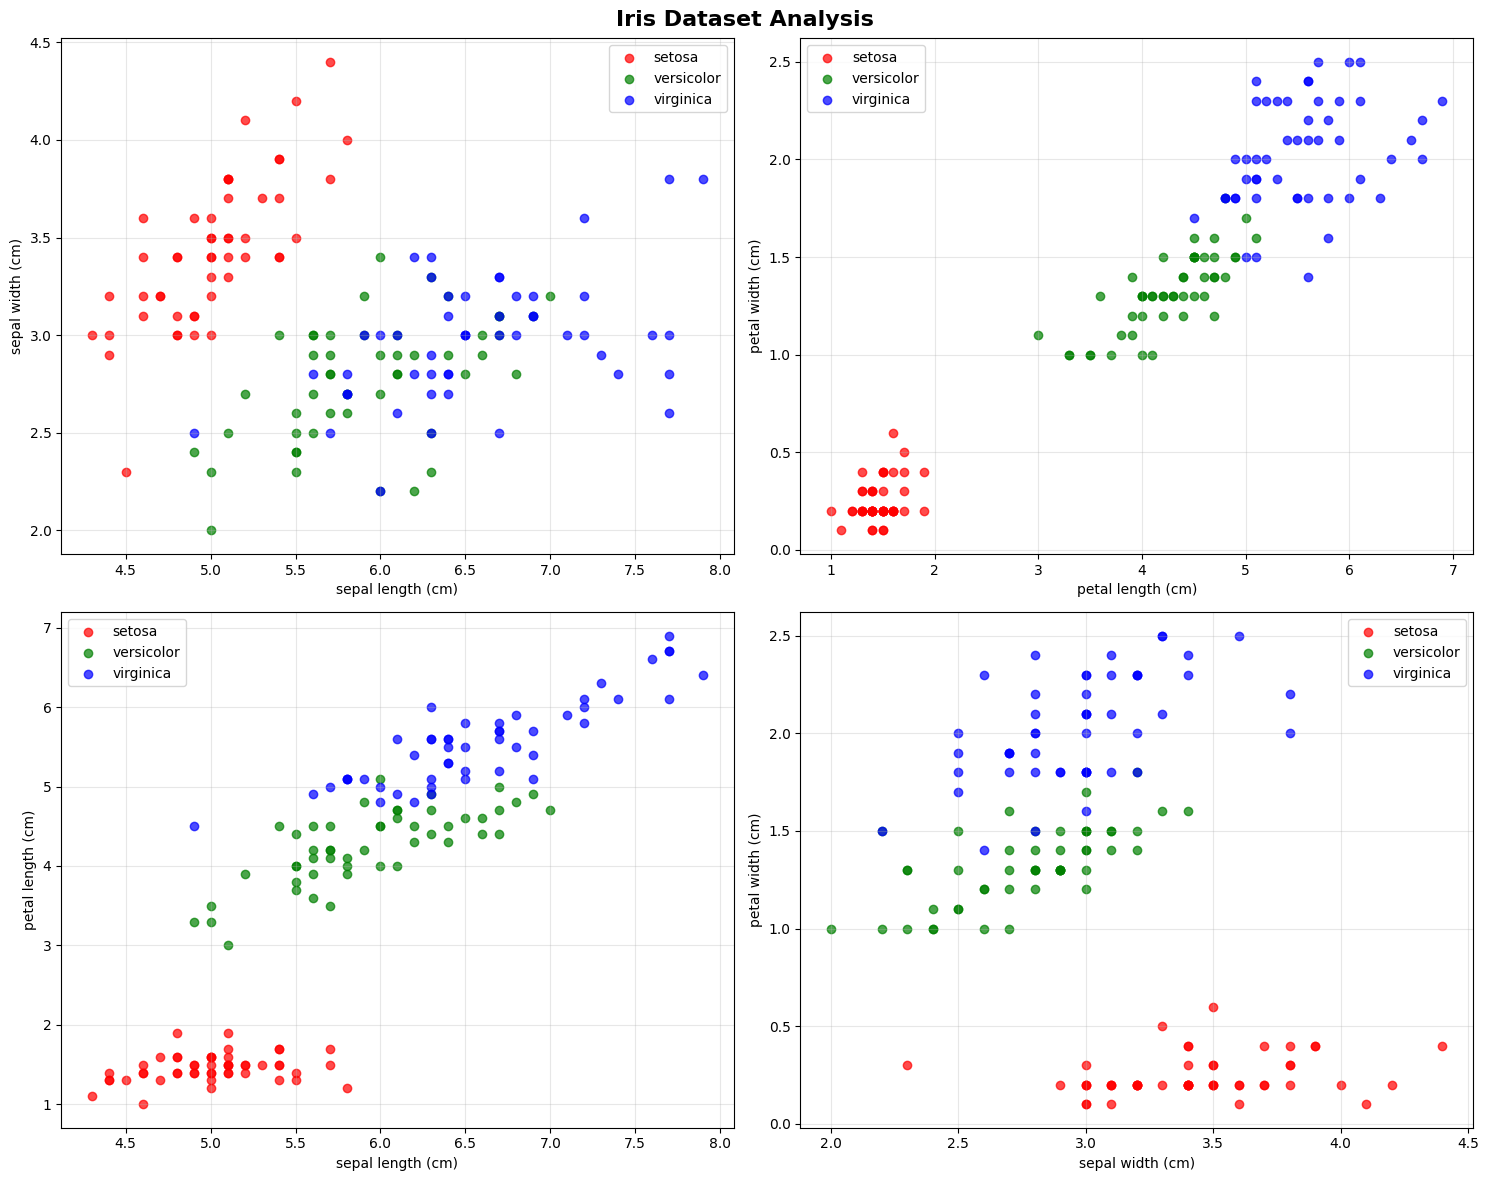

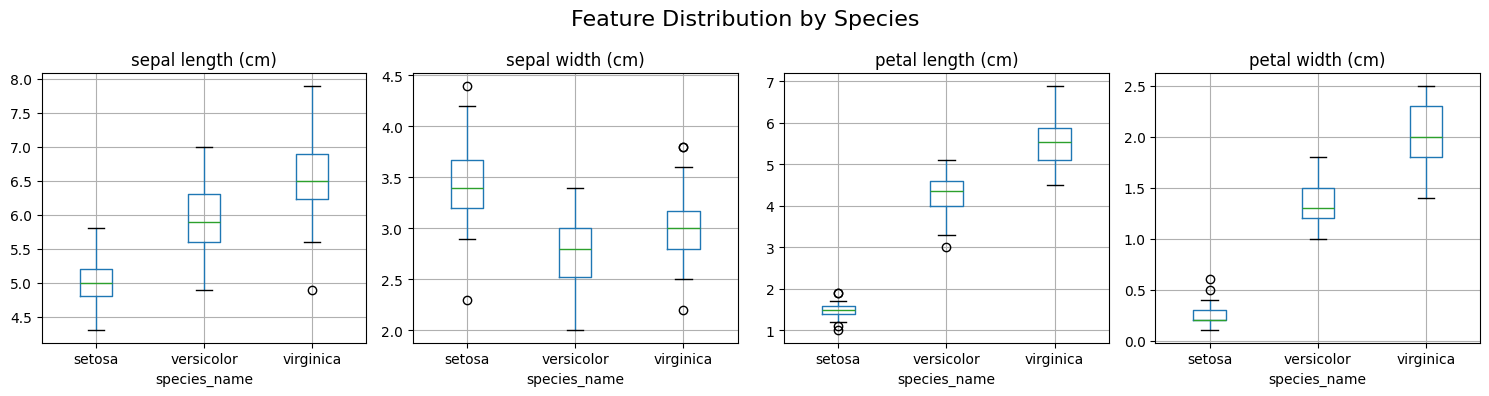


🔄 Splitting data into train/test sets...
✅ Data split completed!
   📚 Training samples: 120
   🧪 Testing samples: 30

📊 Training set distribution:
   Class 0: 40 samples
   Class 1: 40 samples
   Class 2: 40 samples

📊 Test set distribution:
   Class 0: 10 samples
   Class 1: 10 samples
   Class 2: 10 samples

💾 Saving dataset locally...
✅ Dataset saved to: ../data/iris_dataset.npz
✅ CSV saved to: ../data/iris_dataset.csv

☁️  Uploading dataset to GCS...
❌ Failed to upload dataset: name 'PROJECT_ID' is not defined
🎉 Iris dataset setup complete!
💡 This dataset is perfect for learning MLOps concepts:
   • Small size - fast training and inference
   • Clean data - no missing values or outliers
   • Multi-class classification - real ML problem
   • Well-understood - easy to interpret results
❌ Failed to upload dataset: name 'PROJECT_ID' is not defined
🎉 Iris dataset setup complete!
💡 This dataset is perfect for learning MLOps concepts:
   • Small size - fast training and inference
   • Cl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pathlib import Path
import pickle

def load_and_prepare_iris_dataset():
    """Load and prepare the Iris dataset for MLOps pipeline."""
    print("🌸 Loading Iris flower dataset...")
    
    # Load the Iris dataset
    iris = load_iris()
    
    # Create a DataFrame for easier handling
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species_name'] = df['species'].map({0: iris.target_names[0], 
                                           1: iris.target_names[1], 
                                           2: iris.target_names[2]})
    
    print(f"✅ Loaded Iris dataset successfully!")
    print(f"   📊 Total samples: {len(df)}")
    print(f"   🏷️  Classes: {len(iris.target_names)}")
    print(f"   📈 Features: {len(iris.feature_names)}")
    
    return df, iris.data, iris.target, iris.feature_names, iris.target_names

def explore_iris_dataset(df, feature_names, target_names):
    """Basic dataset exploration for Iris data."""
    print("\n📊 Dataset Exploration")
    print("=" * 40)
    print(f"📈 Shape: {df.shape}")
    print(f"📏 Features: {list(feature_names)}")
    print(f"🏷️  Classes: {list(target_names)}")
    
    # Basic statistics
    print(f"\n📋 Basic Statistics:")
    print(df.describe())
    
    # Class distribution
    print(f"\n🌸 Species Distribution:")
    class_counts = df['species_name'].value_counts()
    for species, count in class_counts.items():
        print(f"   {species}: {count} samples")
    
    # Check for missing values
    missing = df.isnull().sum().sum()
    print(f"\n🔍 Missing values: {missing}")
    
    return True

def visualize_iris_data(df):
    """Create visualizations for the Iris dataset."""
    print(f"\n📊 Creating visualizations...")
    
    # Set up the plotting style
    plt.style.use('default')
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Iris Dataset Analysis', fontsize=16, fontweight='bold')
    
    # 1. Pairplot-style scatter
    feature_pairs = [
        ('sepal length (cm)', 'sepal width (cm)'),
        ('petal length (cm)', 'petal width (cm)'),
        ('sepal length (cm)', 'petal length (cm)'),
        ('sepal width (cm)', 'petal width (cm)')
    ]
    
    colors = ['red', 'green', 'blue']
    species = df['species_name'].unique()
    
    for idx, (x_feat, y_feat) in enumerate(feature_pairs):
        ax = axes[idx // 2, idx % 2]
        
        for i, spec in enumerate(species):
            subset = df[df['species_name'] == spec]
            ax.scatter(subset[x_feat], subset[y_feat], 
                      c=colors[i], label=spec, alpha=0.7)
        
        ax.set_xlabel(x_feat)
        ax.set_ylabel(y_feat)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Box plots for each feature
    plt.figure(figsize=(15, 4))
    for i, feature in enumerate(df.columns[:-2]):  # Exclude species columns
        plt.subplot(1, 4, i + 1)
        df.boxplot(column=feature, by='species_name', ax=plt.gca())
        plt.title(f'{feature}')
        plt.suptitle('')  # Remove the automatic title
    
    plt.suptitle('Feature Distribution by Species', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return True

def prepare_train_test_split(X, y):
    """Split the data into training and testing sets."""
    print(f"\n🔄 Splitting data into train/test sets...")
    
    # Split the data (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"✅ Data split completed!")
    print(f"   📚 Training samples: {len(X_train)}")
    print(f"   🧪 Testing samples: {len(X_test)}")
    
    # Verify class distribution in splits
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    
    print(f"\n📊 Training set distribution:")
    for cls, count in zip(unique_train, counts_train):
        print(f"   Class {cls}: {count} samples")
    
    print(f"\n📊 Test set distribution:")
    for cls, count in zip(unique_test, counts_test):
        print(f"   Class {cls}: {count} samples")
    
    return X_train, X_test, y_train, y_test

# Create local data directory
local_data_dir = Path("../data")
local_data_dir.mkdir(exist_ok=True)

print("🌸 Setting up Iris dataset for MLOps learning...")
print("=" * 60)

# Load and prepare the dataset
df, X, y, feature_names, target_names = load_and_prepare_iris_dataset()

# Explore the dataset
explore_iris_dataset(df, feature_names, target_names)

# Visualize the data
visualize_iris_data(df)

# Prepare train/test splits
X_train, X_test, y_train, y_test = prepare_train_test_split(X, y)

# Save dataset locally
print(f"\n💾 Saving dataset locally...")
local_file_path = local_data_dir / "iris_dataset.npz"

# Save as compressed numpy arrays
np.savez_compressed(
    local_file_path,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    feature_names=feature_names,
    target_names=target_names
)

# Also save as CSV for easy inspection
df.to_csv(local_data_dir / "iris_dataset.csv", index=False)

print(f"✅ Dataset saved to: {local_file_path}")
print(f"✅ CSV saved to: {local_data_dir / 'iris_dataset.csv'}")

# Upload to Google Cloud Storage
print(f"\n☁️  Uploading dataset to GCS...")
try:
    from google.cloud import storage
    
    client = storage.Client(project=PROJECT_ID)
    bucket = client.get_bucket(BUCKET_NAME)
    
    # Upload the numpy dataset
    gcs_path = f"{DATA_ROOT}/iris_dataset.npz"
    blob = bucket.blob(gcs_path)
    blob.upload_from_filename(local_file_path)
    
    # Upload the CSV file
    csv_gcs_path = f"{DATA_ROOT}/iris_dataset.csv"
    csv_blob = bucket.blob(csv_gcs_path)
    csv_blob.upload_from_filename(local_data_dir / "iris_dataset.csv")
    
    # Create and upload metadata
    metadata = {
        "dataset_name": "iris_flowers",
        "description": "Classic Iris flower classification dataset",
        "num_samples": len(df),
        "num_features": len(feature_names),
        "num_classes": len(target_names),
        "feature_names": list(feature_names),
        "target_names": list(target_names),
        "train_samples": len(X_train),
        "test_samples": len(X_test)
    }
    
    metadata_path = local_data_dir / "iris_metadata.pkl"
    with open(metadata_path, 'wb') as f:
        pickle.dump(metadata, f)
    
    metadata_blob = bucket.blob(f"{DATA_ROOT}/iris_metadata.pkl")
    metadata_blob.upload_from_filename(metadata_path)
    
    print(f"✅ Dataset uploaded to: gs://{BUCKET_NAME}/{gcs_path}")
    print(f"✅ CSV uploaded to: gs://{BUCKET_NAME}/{csv_gcs_path}")
    print(f"✅ Metadata uploaded to: gs://{BUCKET_NAME}/{DATA_ROOT}/iris_metadata.pkl")
    print(f"📁 Total size: {(blob.size + csv_blob.size + metadata_blob.size) / 1024:.2f} KB")
    
except Exception as e:
    print(f"❌ Failed to upload dataset: {e}")

print("=" * 60)
print("🎉 Iris dataset setup complete!")
print("💡 This dataset is perfect for learning MLOps concepts:")
print("   • Small size - fast training and inference")
print("   • Clean data - no missing values or outliers")
print("   • Multi-class classification - real ML problem")
print("   • Well-understood - easy to interpret results")

## 9. Verify Data Upload to Cloud Storage

Let's verify that our Iris dataset has been successfully uploaded to Google Cloud Storage and is ready for our MLOps pipeline.

In [10]:
def verify_iris_dataset_upload():
    """Verify that the Iris dataset was uploaded correctly to GCS."""
    try:
        from google.cloud import storage
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        
        # List of expected files
        expected_files = [
            f"{DATA_ROOT}/iris_dataset.npz",
            f"{DATA_ROOT}/iris_dataset.csv", 
            f"{DATA_ROOT}/iris_metadata.pkl"
        ]
        
        print("🔍 Verifying Iris dataset upload...")
        print("=" * 50)
        
        total_size = 0
        found_files = []
        
        for file_path in expected_files:
            try:
                blob = bucket.get_blob(file_path)
                if blob:
                    size_kb = blob.size / 1024
                    total_size += size_kb
                    found_files.append(file_path)
                    print(f"✅ {file_path} ({size_kb:.2f} KB)")
                else:
                    print(f"❌ {file_path} - Not found")
            except Exception as e:
                print(f"❌ {file_path} - Error: {e}")
        
        print(f"\n📊 Summary:")
        print(f"   📁 Files found: {len(found_files)}/{len(expected_files)}")
        print(f"   💾 Total size: {total_size:.2f} KB")
        
        if len(found_files) == len(expected_files):
            print("\n🎉 All dataset files successfully uploaded!")
            return True
        else:
            print("\n⚠️  Some files are missing from Cloud Storage")
            return False
            
    except Exception as e:
        print(f"❌ Verification failed: {e}")
        return False

def upload_iris_dataset_to_gcs():
    """Upload the local Iris dataset files to GCS."""
    try:
        from google.cloud import storage
        import pickle
        
        print("☁️  Uploading Iris dataset to GCS...")
        
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        
        # Local data directory
        local_data_dir = Path("../data")
        
        # Files to upload
        files_to_upload = [
            ("iris_dataset.npz", f"{DATA_ROOT}/iris_dataset.npz"),
            ("iris_dataset.csv", f"{DATA_ROOT}/iris_dataset.csv")
        ]
        
        uploaded_files = []
        total_size = 0
        
        for local_file, gcs_path in files_to_upload:
            local_path = local_data_dir / local_file
            if local_path.exists():
                blob = bucket.blob(gcs_path)
                blob.upload_from_filename(str(local_path))
                
                size_kb = blob.size / 1024
                total_size += size_kb
                uploaded_files.append(gcs_path)
                print(f"✅ Uploaded {local_file} -> gs://{BUCKET_NAME}/{gcs_path} ({size_kb:.2f} KB)")
            else:
                print(f"❌ Local file not found: {local_path}")
        
        # Create and upload metadata
        try:
            # Load the data to create metadata
            data = np.load(local_data_dir / "iris_dataset.npz")
            
            metadata = {
                "dataset_name": "iris_flowers",
                "description": "Classic Iris flower classification dataset",
                "num_samples": len(data['X_train']) + len(data['X_test']),
                "num_features": data['X_train'].shape[1],
                "num_classes": len(np.unique(np.concatenate([data['y_train'], data['y_test']]))),
                "feature_names": list(data['feature_names']),
                "target_names": list(data['target_names']),
                "train_samples": len(data['X_train']),
                "test_samples": len(data['X_test'])
            }
            
            # Save metadata locally
            metadata_path = local_data_dir / "iris_metadata.pkl"
            with open(metadata_path, 'wb') as f:
                pickle.dump(metadata, f)
            
            # Upload metadata
            metadata_blob = bucket.blob(f"{DATA_ROOT}/iris_metadata.pkl")
            metadata_blob.upload_from_filename(str(metadata_path))
            
            size_kb = metadata_blob.size / 1024
            total_size += size_kb
            uploaded_files.append(f"{DATA_ROOT}/iris_metadata.pkl")
            print(f"✅ Uploaded metadata -> gs://{BUCKET_NAME}/{DATA_ROOT}/iris_metadata.pkl ({size_kb:.2f} KB)")
            
            data.close()
            
        except Exception as e:
            print(f"⚠️  Failed to create/upload metadata: {e}")
        
        print(f"\n📊 Upload Summary:")
        print(f"   📁 Files uploaded: {len(uploaded_files)}")
        print(f"   💾 Total size: {total_size:.2f} KB")
        
        return len(uploaded_files) > 0
        
    except Exception as e:
        print(f"❌ Upload failed: {e}")
        return False

def test_dataset_loading_from_gcs():
    """Test loading the dataset from GCS to ensure it works."""
    try:
        from google.cloud import storage
        import pickle
        
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        
        print(f"\n🧪 Testing dataset loading from GCS...")
        
        # Download and test the numpy dataset
        blob = bucket.blob(f"{DATA_ROOT}/iris_dataset.npz")
        data_bytes = blob.download_as_bytes()
        
        # Load the data
        import io
        data = np.load(io.BytesIO(data_bytes))
        
        print(f"✅ Successfully loaded dataset from GCS")
        print(f"   📊 Training samples: {data['X_train'].shape[0]}")
        print(f"   🧪 Test samples: {data['X_test'].shape[0]}")
        print(f"   📈 Features: {data['X_train'].shape[1]}")
        print(f"   🏷️  Feature names: {list(data['feature_names'])}")
        print(f"   🌸 Classes: {list(data['target_names'])}")
        
        # Test metadata loading
        try:
            metadata_blob = bucket.blob(f"{DATA_ROOT}/iris_metadata.pkl")
            metadata_bytes = metadata_blob.download_as_bytes()
            metadata = pickle.loads(metadata_bytes)
            print(f"   📋 Metadata loaded: {metadata['dataset_name']}")
        except:
            print(f"   ⚠️  Metadata not available")
        
        data.close()  # Clean up
        return True
        
    except Exception as e:
        print(f"❌ Dataset loading test failed: {e}")
        return False

def display_gcs_file_structure():
    """Display the current file structure in the GCS bucket."""
    try:
        from google.cloud import storage
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        
        print(f"\n📁 GCS Bucket Structure: gs://{BUCKET_NAME}/")
        print("=" * 50)
        
        # List all blobs with the data prefix
        blobs = list(bucket.list_blobs(prefix=DATA_ROOT))
        
        if not blobs:
            print(f"   (empty)")
            return True
        
        for blob in blobs:
            size_kb = blob.size / 1024
            print(f"   📄 {blob.name} ({size_kb:.2f} KB)")
        
        return True
        
    except Exception as e:
        print(f"❌ Failed to display structure: {e}")
        return False

print("💾 Iris Dataset Verification and Upload")
print("=" * 50)

# First, try to upload the dataset (in case it failed before)
upload_ok = upload_iris_dataset_to_gcs()

if upload_ok:
    # Run verification steps
    verification_ok = verify_iris_dataset_upload()
    
    if verification_ok:
        # Test dataset loading
        loading_ok = test_dataset_loading_from_gcs()
        
        if loading_ok:
            print(f"\n🎉 Iris dataset is ready for MLOps pipeline!")
            print(f"📍 Dataset location: gs://{BUCKET_NAME}/{DATA_ROOT}/")
            
            # Display file structure
            display_gcs_file_structure()
            
            print(f"\n📋 Next Steps:")
            print(f"   1. Use this dataset for model training")
            print(f"   2. Create preprocessing pipelines") 
            print(f"   3. Build model evaluation workflows")
            print(f"   4. Deploy the trained model")
        else:
            print(f"\n⚠️  Dataset loading test failed")
    else:
        print(f"\n⚠️  Dataset verification failed")
else:
    print(f"\n❌ Dataset upload failed")

print("=" * 50)

💾 Iris Dataset Verification and Upload
☁️  Uploading Iris dataset to GCS...
✅ Uploaded iris_dataset.npz -> gs://mlops-295610-mlops-bucket/data/iris_dataset.npz (2.45 KB)
✅ Uploaded iris_dataset.npz -> gs://mlops-295610-mlops-bucket/data/iris_dataset.npz (2.45 KB)
✅ Uploaded iris_dataset.csv -> gs://mlops-295610-mlops-bucket/data/iris_dataset.csv (4.09 KB)
✅ Uploaded iris_dataset.csv -> gs://mlops-295610-mlops-bucket/data/iris_dataset.csv (4.09 KB)
✅ Uploaded metadata -> gs://mlops-295610-mlops-bucket/data/iris_metadata.pkl (0.90 KB)

📊 Upload Summary:
   📁 Files uploaded: 3
   💾 Total size: 7.44 KB
✅ Uploaded metadata -> gs://mlops-295610-mlops-bucket/data/iris_metadata.pkl (0.90 KB)

📊 Upload Summary:
   📁 Files uploaded: 3
   💾 Total size: 7.44 KB
🔍 Verifying Iris dataset upload...
🔍 Verifying Iris dataset upload...
✅ data/iris_dataset.npz (2.45 KB)
✅ data/iris_dataset.npz (2.45 KB)
✅ data/iris_dataset.csv (4.09 KB)
✅ data/iris_dataset.csv (4.09 KB)
✅ data/iris_metadata.pkl (0.90 KB)

## 10. Verify Development Environment

Let's run a comprehensive verification to ensure everything is set up correctly for MLOps development.

In [13]:
import sys
import subprocess
import pickle
from pathlib import Path

def comprehensive_verification():
    """Run comprehensive verification of the MLOps environment setup."""
    
    verification_results = {}
    
    print("🔍 Comprehensive Environment Verification")
    print("=" * 60)
    
    # 1. Python Environment
    print("\n1️⃣ Python Environment")
    try:
        version = sys.version_info
        if version.major >= 3 and version.minor >= 8:
            print("   ✅ Python version: OK")
            verification_results['python'] = True
        else:
            print("   ❌ Python version: FAIL")
            verification_results['python'] = False
    except:
        verification_results['python'] = False
    
    # 2. Required Libraries
    print("\n2️⃣ Required Libraries")
    required_libs = ['google.cloud.aiplatform', 'google.cloud.storage', 
                    'sklearn', 'pandas', 'numpy', 'matplotlib']
    lib_status = []
    
    for lib in required_libs:
        try:
            __import__(lib)
            print(f"   ✅ {lib}: OK")
            lib_status.append(True)
        except ImportError:
            print(f"   ❌ {lib}: MISSING")
            lib_status.append(False)
    
    verification_results['libraries'] = all(lib_status)
    
    # 3. GCP Authentication
    print("\n3️⃣ GCP Authentication")
    try:
        result = subprocess.run(['gcloud', 'auth', 'list', '--format=value(account)'], 
                              capture_output=True, text=True, check=True)
        if result.stdout.strip():
            print("   ✅ GCP Authentication: OK")
            verification_results['auth'] = True
        else:
            print("   ❌ GCP Authentication: FAIL")
            verification_results['auth'] = False
    except:
        print("   ❌ GCP Authentication: FAIL")
        verification_results['auth'] = False
    
    # 4. Project Configuration
    print("\n4️⃣ Project Configuration")
    if PROJECT_ID != "your-mlops-project-id":
        print(f"   ✅ Project ID configured: {PROJECT_ID}")
        verification_results['project'] = True
    else:
        print("   ❌ Project ID: NOT CONFIGURED")
        verification_results['project'] = False
    
    # 5. Vertex AI Access
    print("\n5️⃣ Vertex AI Access")
    try:
        models = aiplatform.Model.list()
        print("   ✅ Vertex AI: OK")
        verification_results['vertex_ai'] = True
    except Exception as e:
        print(f"   ❌ Vertex AI: FAIL - {str(e)[:50]}...")
        verification_results['vertex_ai'] = False
    
    # 6. Cloud Storage Access
    print("\n6️⃣ Cloud Storage Access")
    try:
        from google.cloud import storage
        client = storage.Client(project=PROJECT_ID)
        bucket = client.get_bucket(BUCKET_NAME)
        print(f"   ✅ Storage bucket: {BUCKET_NAME}")
        verification_results['storage'] = True
    except Exception as e:
        print(f"   ❌ Storage: FAIL - {str(e)[:50]}...")
        verification_results['storage'] = False
        bucket = None
    
    # 7. Dataset Availability
    print("\n7️⃣ Iris Dataset Availability")
    try:
        if bucket:
            # Check for Iris dataset files
            iris_files = [
                f"{DATA_ROOT}/iris_dataset.npz",
                f"{DATA_ROOT}/iris_dataset.csv",
                f"{DATA_ROOT}/iris_metadata.pkl"
            ]
            
            found_files = 0
            for file_path in iris_files:
                blob = bucket.get_blob(file_path)
                if blob:
                    found_files += 1
            
            if found_files >= 2:  # At least the main dataset files
                print(f"   ✅ Iris dataset uploaded: {found_files}/{len(iris_files)} files")
                verification_results['dataset'] = True
            else:
                print(f"   ❌ Iris dataset: INCOMPLETE ({found_files}/{len(iris_files)} files)")
                verification_results['dataset'] = False
        else:
            print("   ❌ Dataset: CANNOT CHECK (no bucket access)")
            verification_results['dataset'] = False
    except Exception as e:
        print(f"   ❌ Dataset: ERROR - {str(e)[:50]}...")
        verification_results['dataset'] = False
    
    # Summary
    print("\n" + "=" * 60)
    print("📋 VERIFICATION SUMMARY")
    print("=" * 60)
    
    passed = sum(verification_results.values())
    total = len(verification_results)
    
    for check, status in verification_results.items():
        status_icon = "✅" if status else "❌"
        check_name = check.replace('_', ' ').title()
        if check == 'dataset':
            check_name = "Iris Dataset"
        print(f"   {status_icon} {check_name}")
    
    print(f"\n🎯 Overall Status: {passed}/{total} checks passed")
    
    if passed == total:
        print("\n🎉 CONGRATULATIONS! Your MLOps environment is fully configured!")
        print("\n🚀 You're ready to start building your MLOps pipeline!")
        print("\n📋 Next steps:")
        print("   1. Check off completed tasks in TASKS.md")
        print("   2. Move to Phase 2: Data Pipeline Implementation") 
        print("   3. Start with notebook 02_data_pipeline.ipynb")
        print("\n🌸 Using the Iris dataset gives you these advantages:")
        print("   • Fast training and inference")
        print("   • Clean, well-understood data")
        print("   • Perfect for learning MLOps concepts")
        print("   • Low cost for experimentation")
    else:
        print("\n⚠️  Some components need attention before proceeding.")
        print("\n🔧 Please fix the failed checks above.")
    
    print("=" * 60)
    
    return verification_results

# Run comprehensive verification
results = comprehensive_verification()

# Save configuration for future notebooks
config_summary = {
    'project_id': PROJECT_ID,
    'region': REGION,
    'bucket_name': BUCKET_NAME,
    'dataset_type': 'iris',  # Updated to reflect dataset change
    'verification_results': results,
    'setup_complete': all(results.values())
}

# Save to local config file for other notebooks to use
config_path = Path('../configs/setup_config.pkl')
config_path.parent.mkdir(exist_ok=True)

with open(config_path, 'wb') as f:
    pickle.dump(config_summary, f)

print(f"\n💾 Configuration saved to: {config_path}")
print(f"🌸 Ready to build MLOps pipeline with Iris dataset!")

🔍 Comprehensive Environment Verification

1️⃣ Python Environment
   ✅ Python version: OK

2️⃣ Required Libraries
   ✅ google.cloud.aiplatform: OK
   ✅ google.cloud.storage: OK
   ✅ sklearn: OK
   ✅ pandas: OK
   ✅ numpy: OK
   ✅ matplotlib: OK

3️⃣ GCP Authentication
   ✅ GCP Authentication: OK

4️⃣ Project Configuration
   ✅ Project ID configured: mlops-295610

5️⃣ Vertex AI Access
   ✅ GCP Authentication: OK

4️⃣ Project Configuration
   ✅ Project ID configured: mlops-295610

5️⃣ Vertex AI Access
   ✅ Vertex AI: OK

6️⃣ Cloud Storage Access
   ✅ Vertex AI: OK

6️⃣ Cloud Storage Access
   ✅ Storage bucket: mlops-295610-mlops-bucket

7️⃣ Iris Dataset Availability
   ✅ Storage bucket: mlops-295610-mlops-bucket

7️⃣ Iris Dataset Availability
   ✅ Iris dataset uploaded: 3/3 files

📋 VERIFICATION SUMMARY
   ✅ Python
   ✅ Libraries
   ✅ Auth
   ✅ Project
   ✅ Vertex Ai
   ✅ Storage
   ✅ Iris Dataset

🎯 Overall Status: 7/7 checks passed

🎉 CONGRATULATIONS! Your MLOps environment is fully con